#### Define N distinct outcomes that sum to K each time an experiment takes place. Each outcome has its own probability.

multinomial(K, [theta_1, theta_2, .., theta_N])

In [347]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial
%matplotlib inline

In [331]:
dist = multinomial(10, np.array([0.2,0.8]))

In [81]:
dist.mean()

array([2., 8.])

In [82]:
dist.p

array([0.2, 0.8])

In [83]:
dist.pmf([4,6])

0.08808038400000004

In [341]:
dist.entropy()

array(1.87595361)

In [87]:
rs = dist.random_state

#### Distribution's Entropy

In [335]:
dist1 = multinomial(10, np.array([0.5,0.5]))
dist2 = multinomial(10, np.array([0.3,0.7]))
dist3 = multinomial(10, np.array([0.1,0.9]))

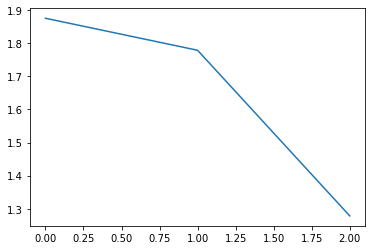

In [349]:
plt.plot(np.array([dist1.entropy(), dist2.entropy(), dist3.entropy()]))

### Calculating the covariance matrix of the distribution

{Var} (X_{i})=np_{i}(1-p_{i})

{Cov} (X_{i},X_{j})=-np_{i}p_{j}

In [75]:
dist.cov()

array([[ 1.6, -1.6],
       [-1.6,  1.6]])

In [77]:
10*0.2*0.8

1.6

## 2D Case

In [133]:
dist = multinomial(10, np.array([0.2,0.8]))
x = np.linspace(0,10,11)
y = np.zeros(11)
#y = np.linspace(1,10,10)
for i in range(0,x.shape[0]):
    y[i] = 10 - x[i]
y[y<0] = 0
xy = np.array([x,y])

In [143]:
xy = np.array([x,y]).T
xy

array([[ 0., 10.],
       [ 1.,  9.],
       [ 2.,  8.],
       [ 3.,  7.],
       [ 4.,  6.],
       [ 5.,  5.],
       [ 6.,  4.],
       [ 7.,  3.],
       [ 8.,  2.],
       [ 9.,  1.],
       [10.,  0.]])

### Distribution skewed towards the high probability draws

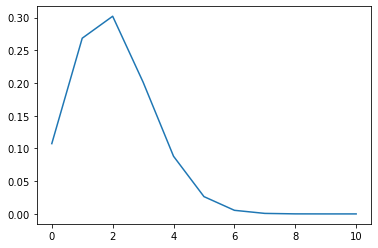

In [146]:
plt.plot(dist.pmf(xy))

## 3D Case

In [287]:
dist = multinomial(10, np.array([0.2,0.3,0.5]))
x = np.linspace(0,10,11)
x_p = np.zeros(450)
y_p = np.zeros(450)
z_p = np.zeros(450)
k = 0
for i in range(0,x.shape[0]):
    x_1 = np.roll(x,i)[0]
    res = 10 - x_1
    #print("x_1 is", x_1)
    #print("res is", res)
    if res>0:
        for j in range(0,int(res)+1):
            #print("j is", j)
            #print("z is", res-j)
            k = k+1
            x_p[k] = x_1
            y_p[k] = j
            z_p[k] = res - j
    else:
        k = k+1
        x_p[k] = x_1
        y_p[k] = 0
        z_p[k] = 0

In [293]:
xyz = np.array([x_p[1:67],y_p[1:67],z_p[1:67]]).T

#### 3D Representation

<IPython.core.display.Javascript object>


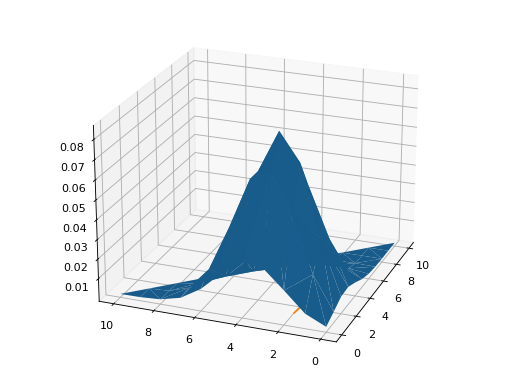

In [329]:
%matplotlib notebook #enables interactivity
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(x_p[1:67],y_p[1:67],dist.pmf(xyz))

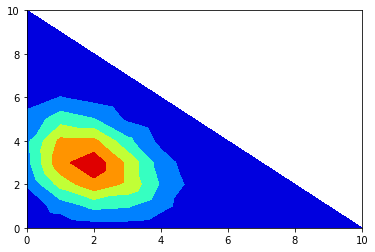

In [298]:
plt.tricontourf(x_p[1:67],y_p[1:67], dist.pmf(xyz), cmap='jet')

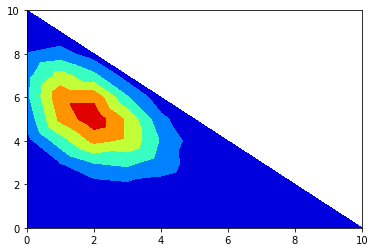

In [299]:
plt.tricontourf(x_p[1:67],z_p[1:67], dist.pmf(xyz), cmap='jet')

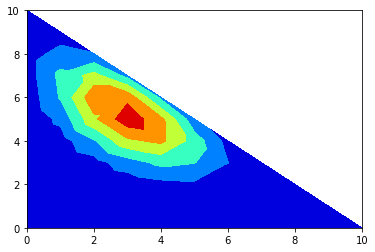

In [300]:
plt.tricontourf(y_p[1:67],z_p[1:67], dist.pmf(xyz), cmap='jet')